In [1]:
#import required libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#import required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Step 1 - Load Data
import pandas as pd
df = pd.read_excel("CEP 1_ Dataset.xlsx")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

# 1. Preliminary analysis

**a.Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

## Missing Values

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**No missing values are there in the data**

## Duplicate Records

In [6]:
duplidate_rows_df = df[df.duplicated()]
print(duplidate_rows_df.shape)
duplidate_rows_df.head()

(1, 14)


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1

**There is a duplicate record (#164) in the data - we need remove it**

## Categorical Variables

In [7]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [9]:
df.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [10]:
df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [11]:
df.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

In [12]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [13]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [14]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [15]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

**Cat_list = ['sex','cp','fbs','restecg','exang','slope','ca','thal']**

The above features are categorical features - we need to create dummy encoding for these variables later while building the model

## Numerical Variables

In [16]:
all_columns = df.columns.to_list()
all_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

**num_cols = ['age','trestbps','chol','thalach','oldpeak']**

The above are numebr columns in our dataframe

## Outliers - Skip the outlier exercise (We will remove later if required) 

/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


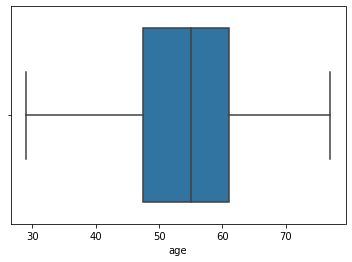

In [17]:
sns.boxplot(df['age']);

No outliers in the age column

/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


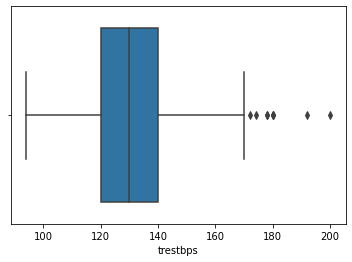

In [18]:
sns.boxplot(df['trestbps']);

There are a few outliers in the trestbps columns but not much, we can ignore for the time being

/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


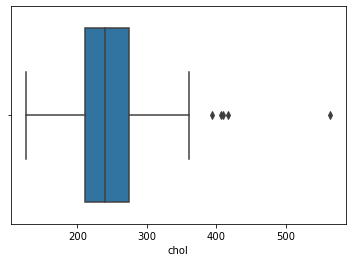

In [19]:
sns.boxplot(df['chol']);

There are a few outliers in the trestbps columns but not much, we can ignore for the time being

/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


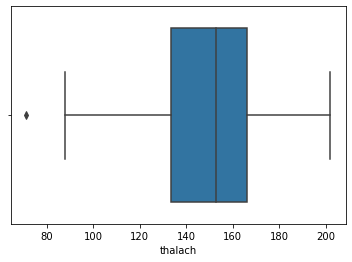

In [20]:
sns.boxplot(df['thalach']);

There are a few outliers in the thalach columns but not much, we can ignore for the time being

/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


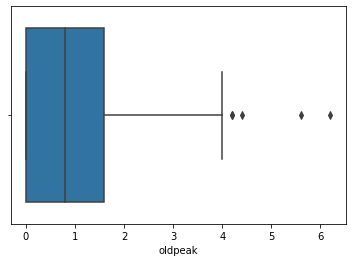

In [21]:
sns.boxplot(df['oldpeak']);

There are a few outliers in the oldpeak columns but not much, we can ignore for the time being

In [22]:
# General Function to remove outlier
def treat_outlier(col):
    q1, q3 = col.quantile([0.25,0.75])
    IQR = q3-q1
    lri = q1-(1.5*IQR)
    uri = q3 + (1.5*IQR)
    return lri, uri

### trestbps - Outlier treatment

In [23]:
# lri,uri = treat_outlier(df['trestbps'])
# print(lri)
# print(uri)

In [24]:
# df['trestbps'] = np.where(df['trestbps']>uri,uri,df['trestbps'])
# df['trestbps'] = np.where(df['trestbps']<lri,lri,df['trestbps'])

In [25]:
# sns.boxplot(df['trestbps']);

### chol - Outlier treatment
### oldpeak - Outlier treatment

## Target Column Imbalance

In [26]:
df.target.value_counts(normalize = True)
# 0 - People who had CVD (heart-attack)
# 1 - People who do not have CVD (heart-attack)

# 0= disease
# 1= no disease

# We have to predict 0 in this case?

1    0.544554
0    0.455446
Name: target, dtype: float64

There is no class imbalance in the target feature - we are good to go


**b.Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy**

In [27]:
df = df.drop_duplicates()
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [28]:
df.shape

(302, 14)

In [29]:
duplidate_rows_df = df[df.duplicated()]
print(duplidate_rows_df.shape)
duplidate_rows_df.head()

(0, 14)


Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []

Duplicate records are removed - there are no duplicates in the data

# **2.Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below**

## a.Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

#### Numerical Data

**Check the statistical summary for numerical variables only**

In [30]:
numerical_data = df[['age','trestbps','chol','thalach','oldpeak']]
numerical_data.head()

age  trestbps  chol  thalach  oldpeak
0   63       145   233      150      2.3
1   37       130   250      187      3.5
2   41       130   204      172      1.4
3   56       120   236      178      0.8
4   57       120   354      163      0.6

**Stats summary**

In [31]:
numerical_data.describe()

age    trestbps        chol     thalach     oldpeak
count  302.00000  302.000000  302.000000  302.000000  302.000000
mean    54.42053  131.602649  246.500000  149.569536    1.043046
std      9.04797   17.563394   51.753489   22.903527    1.161452
min     29.00000   94.000000  126.000000   71.000000    0.000000
25%     48.00000  120.000000  211.000000  133.250000    0.000000
50%     55.50000  130.000000  240.500000  152.500000    0.800000
75%     61.00000  140.000000  274.750000  166.000000    1.600000
max     77.00000  200.000000  564.000000  202.000000    6.200000

/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


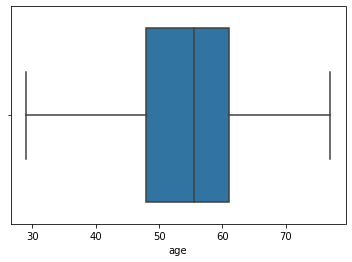

In [32]:
sns.boxplot(df['age']);

/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


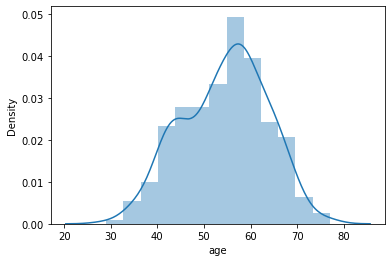

In [33]:
# spread of the data - age of the patient
sns.distplot(df['age']);

**Report** - Age of the patient is quite normally distributed. no skewness as such

**mean - 54.42053**

**median - 55**

since mean and median values are almost equal

**Create a report on the other numerical variables**??

[trestbps,chol,	thalach,oldpeak]

## b.Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [34]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [35]:
categorical_data = df[['sex','cp','fbs','restecg','exang','slope','ca','thal','target']]
print(categorical_data.shape)
categorical_data.head()

(302, 9)


sex  cp  fbs  restecg  exang  slope  ca  thal  target
0    1   3    1        0      0      0   0     1       1
1    1   2    0        1      0      0   0     2       1
2    0   1    0        0      0      2   0     2       1
3    1   1    0        1      0      2   0     2       1
4    0   0    0        1      1      2   0     2       1

### Sex of the Patient

In [36]:
categorical_data.sex.value_counts(normalize = True)

1    0.682119
0    0.317881
Name: sex, dtype: float64

/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


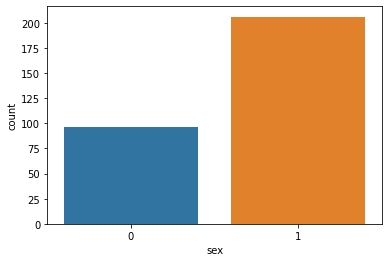

In [37]:
sns.countplot(categorical_data.sex);

**Report** - 68% of the patient are male

### CP

In [38]:
categorical_data.cp.value_counts(normalize = True)

0    0.473510
2    0.284768
1    0.165563
3    0.076159
Name: cp, dtype: float64

/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


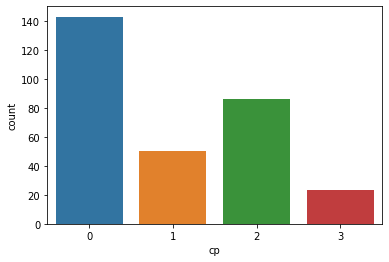

In [39]:
sns.countplot(categorical_data.cp);

**Report** -

In [40]:
categorical_data.fbs.value_counts()

0    257
1     45
Name: fbs, dtype: int64

In [41]:
categorical_data.restecg.value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

In [42]:
categorical_data.exang.value_counts()

0    203
1     99
Name: exang, dtype: int64

In [43]:
categorical_data.slope.value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

In [44]:
categorical_data.ca.value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

In [45]:
categorical_data.thal.value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [46]:
categorical_data.target.value_counts()

1    164
0    138
Name: target, dtype: int64

## c.Study the occurrence of CVD across the Age category

### Bi-variate Analysis - Age and CVD (Target) Feature

<AxesSubplot:xlabel='target', ylabel='age'>

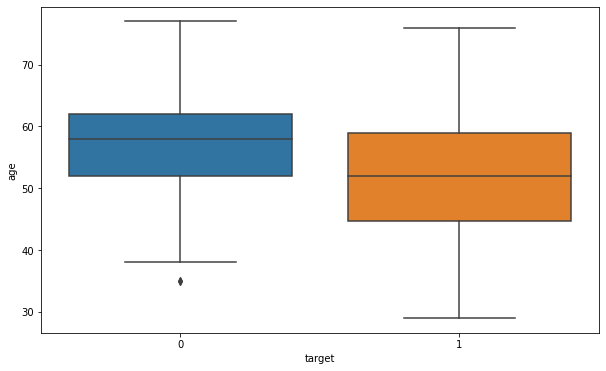

In [47]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'target',y = 'age',data= df)

**Report** - Median/Mean Age is much higher for people who have the CVD disease than who do not have

<AxesSubplot:xlabel='target', ylabel='age'>

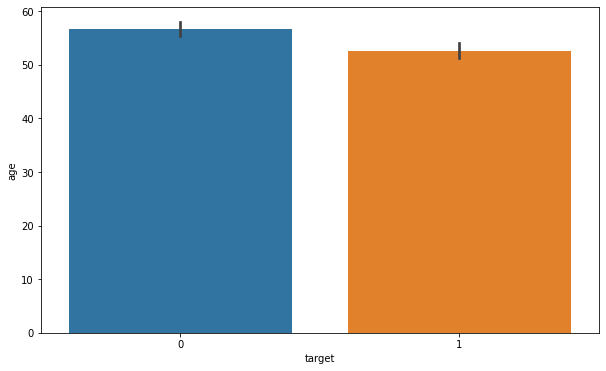

In [48]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'target',y = 'age',data= df)

**Report** - On an avg patient with CVD disease have a higher age (distribution) than people who do not have the disease

## d.Study the composition of all patients with respect to the Sex category

### Bi-variate Analysis - Gender and CVD (Target) Feature

In [49]:
table=pd.crosstab(df.sex,df.target)
table

target    0   1
sex            
0        24  72
1       114  92

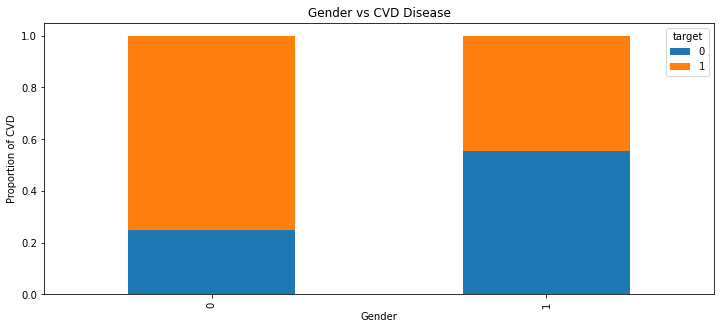

In [50]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(12,5))
plt.title('Gender vs CVD Disease')
plt.xlabel('Gender')
plt.ylabel('Proportion of CVD');

**Report** - Presence of CVD ~20% higher in Men than in women. CVD is much higher in Men

1 - male
0 - female

## e.Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


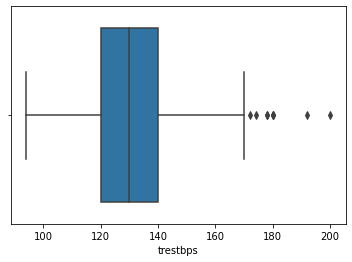

In [51]:
sns.boxplot(df['trestbps']);

### Bi-variate analysis - between CVD and trestbps

<AxesSubplot:xlabel='target', ylabel='trestbps'>

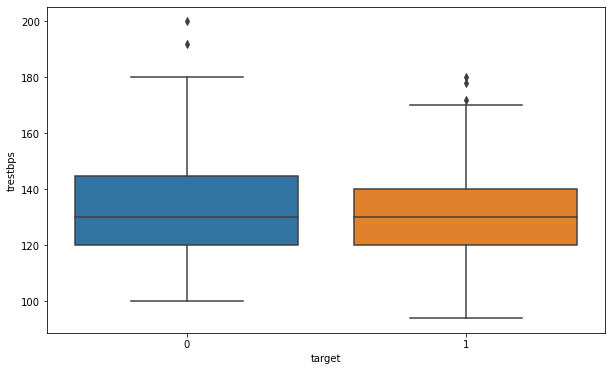

In [52]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'target',
            y = 'trestbps',
            data= df)

**Report** - Very high blood pressure (anomalies) does impact the heart attacks or people who have higher bloodpressur, presence of CVD is also higher

In [ ]:
df[df['target'] == 0]['trestbps'].median() # with disease
df[df['target'] == 1]['trestbps'].median() # without disease CVD

## f.Describe the relationship between cholesterol levels and a target variable

### Bi-variate analysis - between CVD and Chol

<AxesSubplot:xlabel='target', ylabel='chol'>

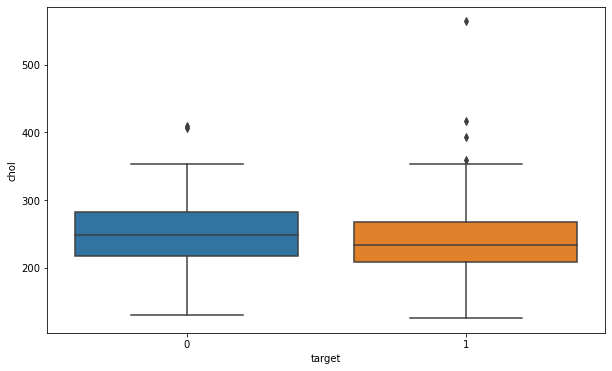

In [53]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'target',y = 'chol',data= df)

**Report** - On an avg, people who have CVD, have high cholestrol. High chol leads to higher heartattacks But there are a few outleirs where we have high cholestrol - CVD is not detected  

## g.State what relationship exists between peak exercising and the occurrence of a heart attack

### Bi-variate analysis - between CVD and slope

In [54]:
table=pd.crosstab(df.slope,
                  df.target)
table

target   0    1
slope          
0       12    9
1       91   49
2       35  106

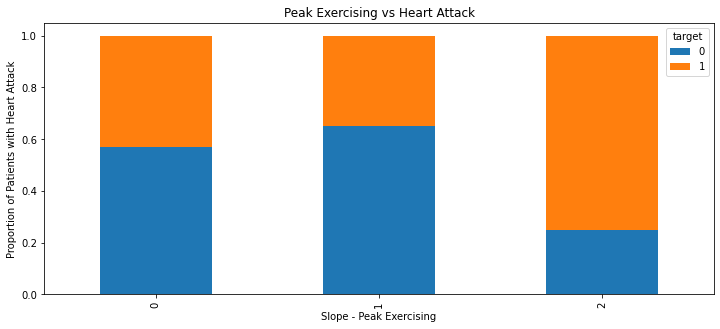

In [55]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(12,5))
plt.title('Peak Exercising vs Heart Attack')
plt.xlabel('Slope - Peak Exercising')
plt.ylabel('Proportion of Patients with Heart Attack');

**Report** - People who are doing upsloping exercise have significantly lesser heartattacks than people who are doing either flat or downsloping

0: downsloping

1: flat

2: upsloping

## h.Check if thalassemia is a major cause of CVD

In [56]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

### Bi-variate analysis - between CVD and thalassemia

In [57]:
table=pd.crosstab(df.thal,df.target)
table

target   0    1
thal           
0        1    1
1       12    6
2       36  129
3       89   28

thal: Results of the blood flow observed via the radioactive dye.
    
Value 1: fixed defect (no blood flow in some part of the heart)

Value 2: normal blood flow
    
Value 3: reversible defect (a blood flow is observed but it is not normal)

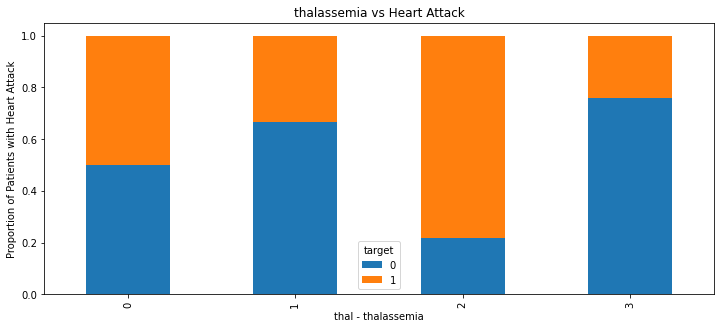

In [58]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(12,5))
plt.title('thalassemia vs Heart Attack')
plt.xlabel('thal - thalassemia')
plt.ylabel('Proportion of Patients with Heart Attack');

**Report** - to be done by learners 

## i.List how the other factors determine the occurrence of CVD

**Perform the similar exercise for the other variables - To be done by learners**

## j.Use a pair plot to understand the relationship between all the given variables

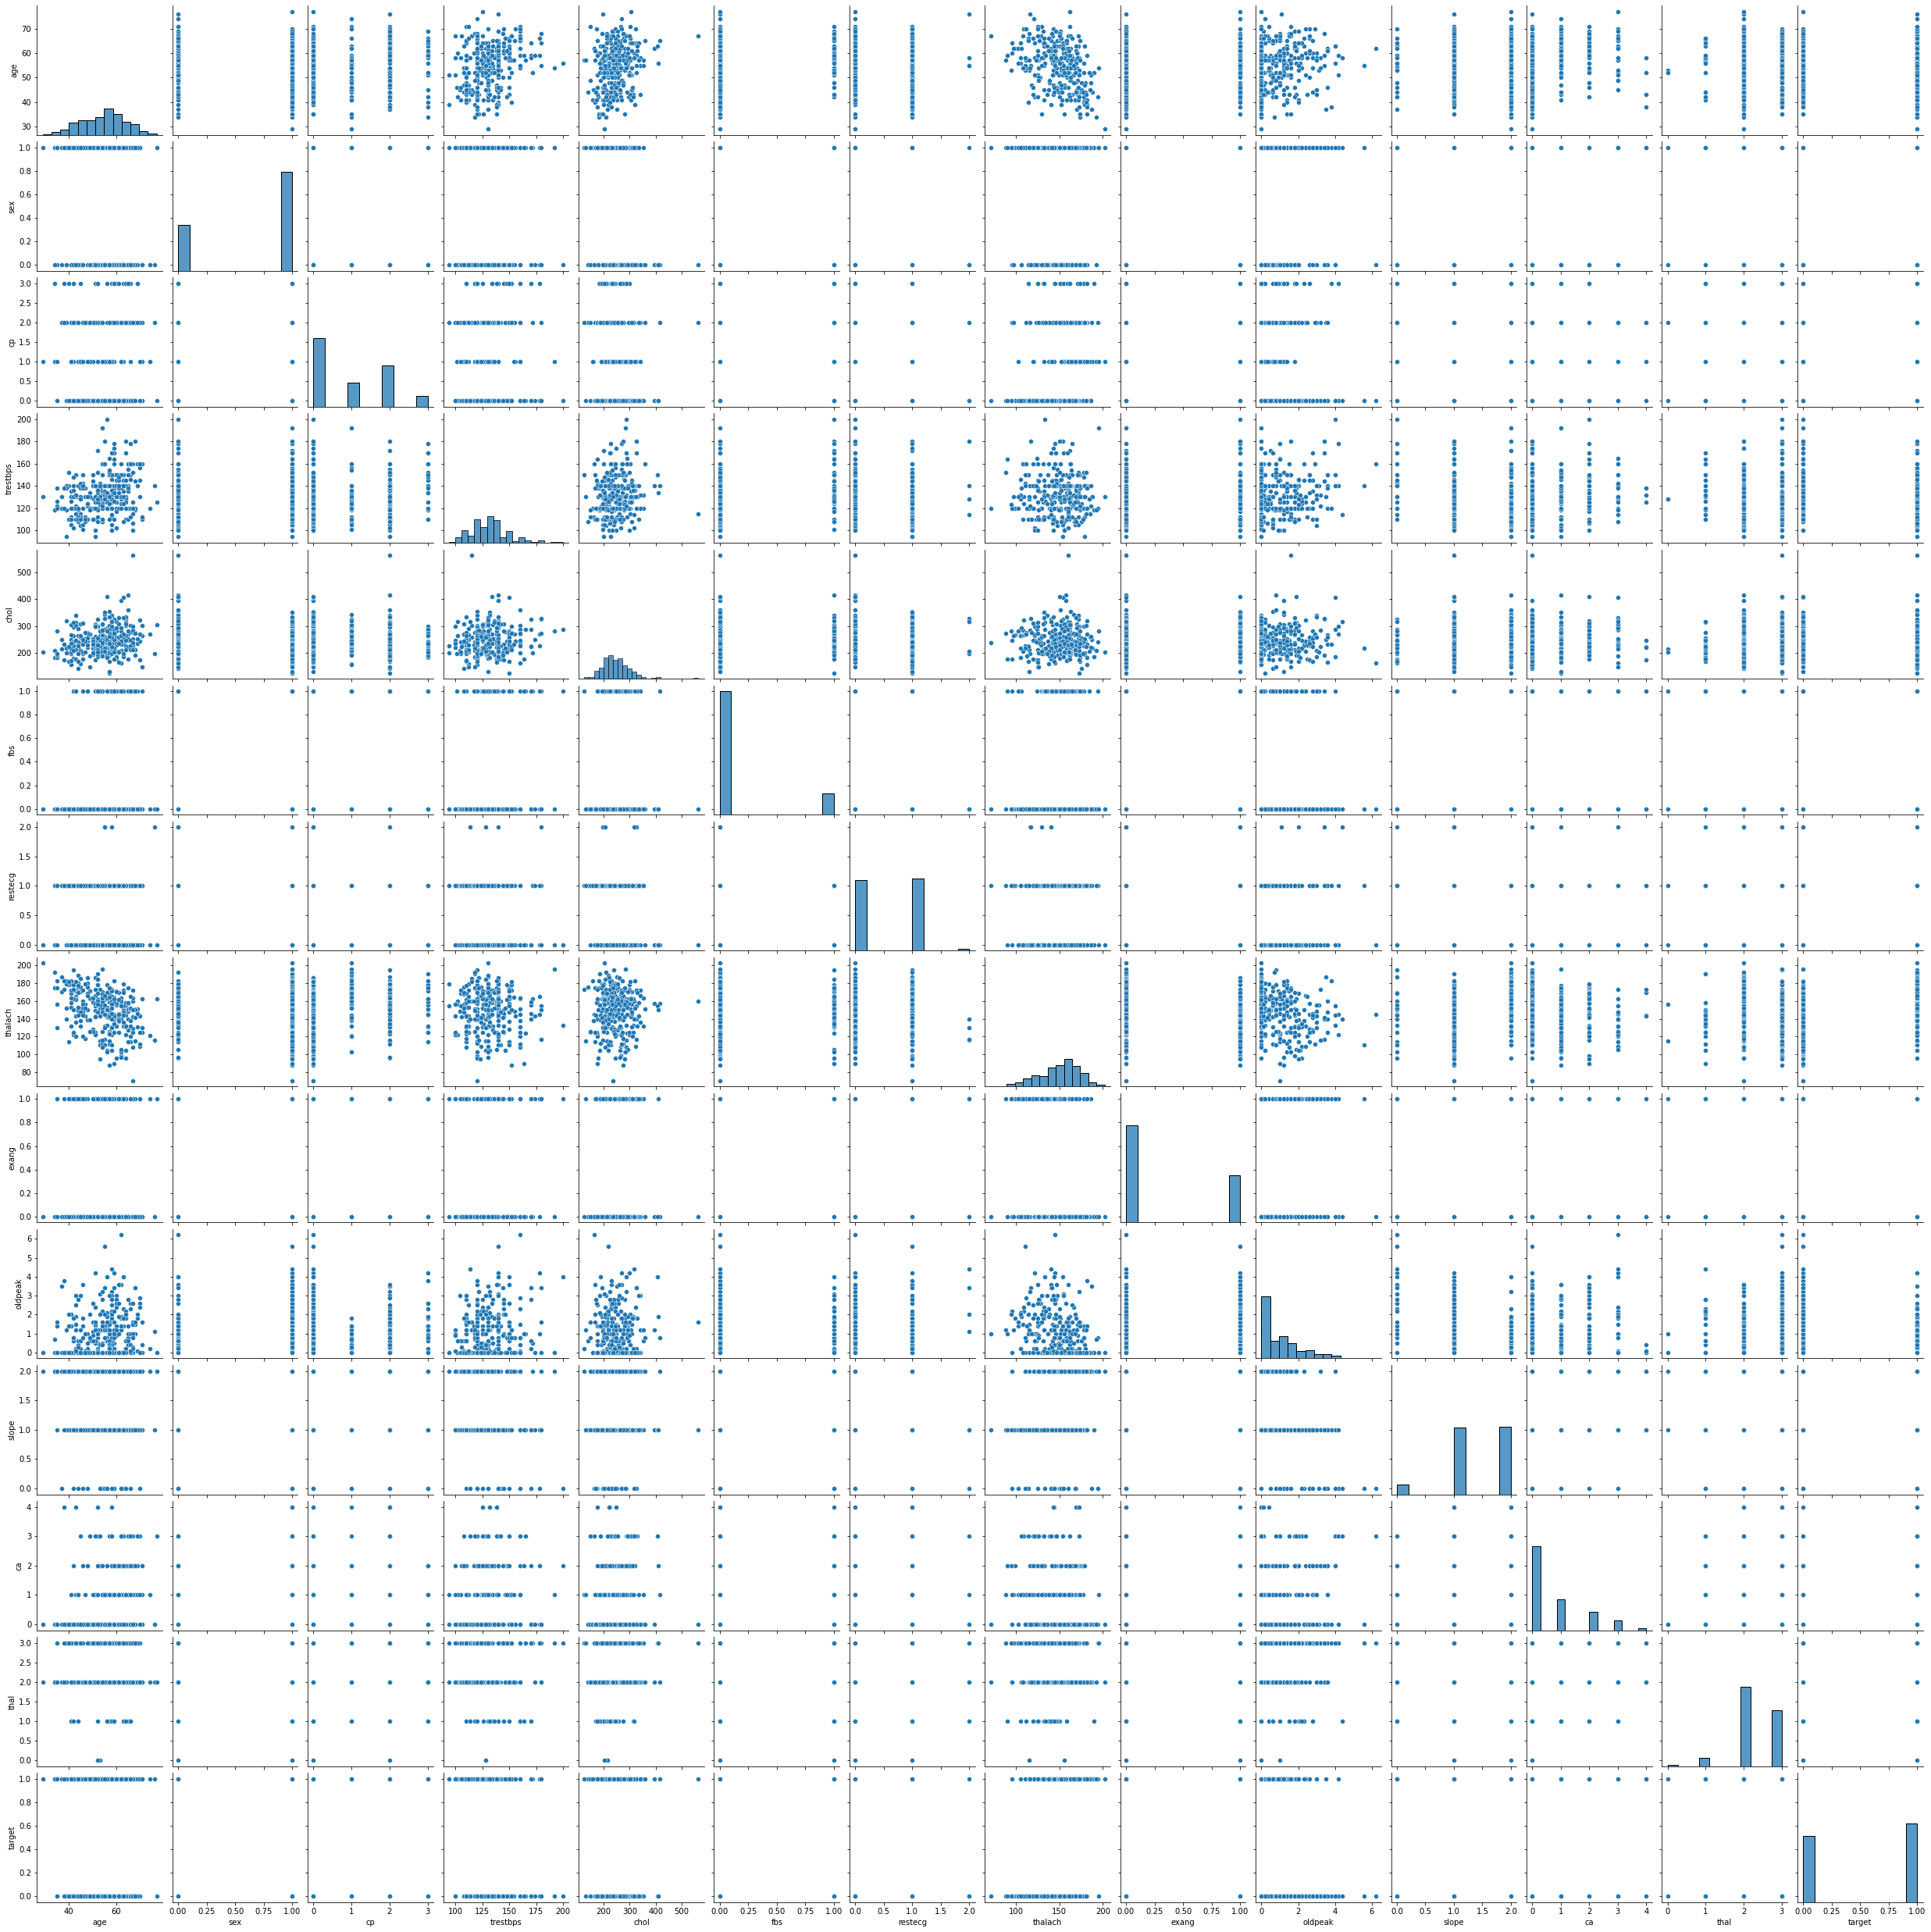

In [59]:
sns.pairplot(df)

**Report** - to be done by learners

# 3.Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

## Correlation Analysis

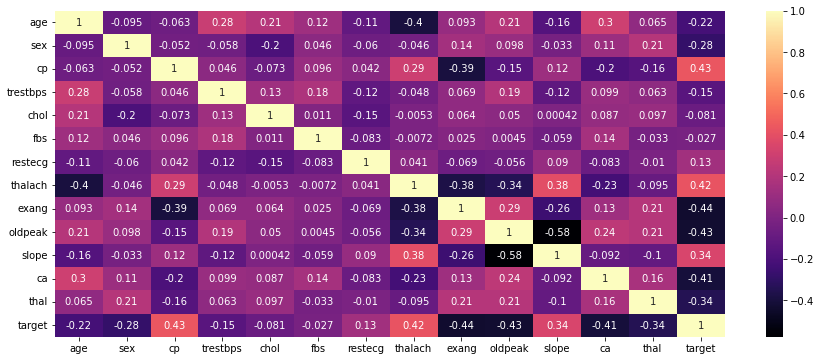

In [60]:
plt.figure(figsize = (15,6))
sns.heatmap(df.corr(), cmap = 'magma', annot = True);

**Report** - Interpret the results, to be done by learners (high, low and medium corrletion among the variables

## Model base data preparation

In [61]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

### Dummy Encoding for categorical variables

In [62]:
# categorical_data = df[['sex','cp','fbs','restecg','exang','slope','ca','thal']]
# print(categorical_data.shape)
# categorical_data.head()

In [63]:
cat_feats = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [64]:
final_data = pd.get_dummies(df,
                            columns=cat_feats, 
                            
                            drop_first = True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        302 non-null    int64  
 1   trestbps   302 non-null    int64  
 2   chol       302 non-null    int64  
 3   thalach    302 non-null    int64  
 4   oldpeak    302 non-null    float64
 5   target     302 non-null    int64  
 6   sex_1      302 non-null    uint8  
 7   cp_1       302 non-null    uint8  
 8   cp_2       302 non-null    uint8  
 9   cp_3       302 non-null    uint8  
 10  fbs_1      302 non-null    uint8  
 11  restecg_1  302 non-null    uint8  
 12  restecg_2  302 non-null    uint8  
 13  exang_1    302 non-null    uint8  
 14  slope_1    302 non-null    uint8  
 15  slope_2    302 non-null    uint8  
 16  ca_1       302 non-null    uint8  
 17  ca_2       302 non-null    uint8  
 18  ca_3       302 non-null    uint8  
 19  ca_4       302 non-null    uint8  
 20  thal_1    

In [65]:
final_data.head()

age  trestbps  chol  thalach  oldpeak  target  sex_1  cp_1  cp_2  cp_3  \
0   63       145   233      150      2.3       1      1     0     0     1   
1   37       130   250      187      3.5       1      1     0     1     0   
2   41       130   204      172      1.4       1      0     1     0     0   
3   56       120   236      178      0.8       1      1     1     0     0   
4   57       120   354      163      0.6       1      0     0     0     0   

   ...  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  thal_2  \
0  ...        0        0        0     0     0     0     0       1       0   
1  ...        0        0        0     0     0     0     0       0       1   
2  ...        0        0        1     0     0     0     0       0       1   
3  ...        0        0        1     0     0     0     0       0       1   
4  ...        1        0        1     0     0     0     0       0       1   

   thal_3  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 23 columns]

### Separate the X & Y variables

In [66]:
X = final_data.drop('target',axis=1)

y = final_data['target']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=101)

In [69]:
print("training data shape", X_train.shape)
print("test data shape", X_test.shape)
print("training target shape", y_train.shape)
print("test target shape", y_test.shape)

training data shape (211, 22)
test data shape (91, 22)
training target shape (211,)
test target shape (91,)


In [70]:
#Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [221]:
lr= LogisticRegression(fit_intercept = False, 
                       penalty='none', 
                       solver='newton-cg')

In [222]:
lr_fit = lr.fit(X_train,y_train)

In [223]:
#Fit the model in train and test data
lr_fit.score(X_train,y_train)

0.8909952606635071

### Evalution on the train data

In [224]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,plot_confusion_matrix

In [225]:
# Step 6 - Predicting NB classifier model on x_test
y_pred_train = lr_fit.predict(X_train)

In [226]:
accuracy_train = accuracy_score(y_train, y_pred_train) 
print("Accuracy score:",accuracy_train)

Accuracy score: 0.8909952606635071


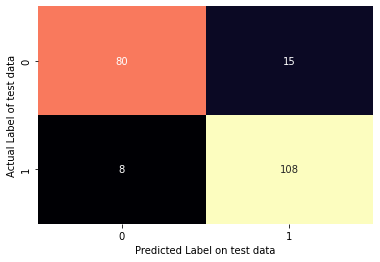

In [227]:
# Let us check how well our model is predicting 1's and 0's 
# plot_confusion_matrix(log_sklearn,X,y)
sns.heatmap(confusion_matrix(y_train,y_pred_train),
            annot=True,
            fmt='d',
            cbar=False,
            cmap='magma')

plt.xlabel("Predicted Label on test data")
plt.ylabel("Actual Label of test data");

In [228]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        95
           1       0.88      0.93      0.90       116

    accuracy                           0.89       211
   macro avg       0.89      0.89      0.89       211
weighted avg       0.89      0.89      0.89       211



### Test Accuracy

In [229]:
# Step 6 - Predicting NB classifier model on x_test
y_pred_test = lr_fit.predict(X_test)

In [230]:
accuracy_test = accuracy_score(y_test, y_pred_test) 
print("Accuracy score:",accuracy_test)

Accuracy score: 0.8241758241758241


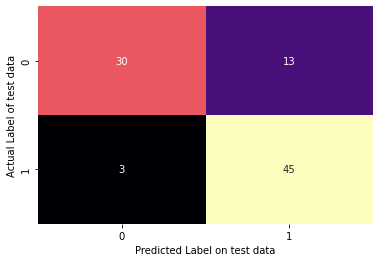

In [231]:
# Let us check how well our model is predicting 1's and 0's 
# plot_confusion_matrix(log_sklearn,X,y)
sns.heatmap(confusion_matrix(y_test,y_pred_test),
            annot=True,
            fmt='d',
            cbar=False,
            cmap='magma')

plt.xlabel("Predicted Label on test data")
plt.ylabel("Actual Label of test data");

In [232]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79        43
           1       0.78      0.94      0.85        48

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.84      0.82      0.82        91



**No overfitting in the model**

In [233]:
print(lr_fit.coef_, lr_fit.intercept_)

[[ 9.50797880e-03 -1.85810439e-02 -1.14468841e-03 -1.14007207e-03
  -6.44599437e-01 -1.50959050e+00  1.13654320e+00  2.63014143e+00
   2.90679267e+00  8.18931539e-01  3.53458763e-01 -1.47377874e+00
  -6.54281595e-01 -1.66445320e+00 -1.61811700e-01 -2.65052282e+00
  -3.07837891e+00 -1.48474980e+00  1.19366146e+01  6.75748582e+00
   5.70057740e+00  4.00992533e+00]] [0.]


In [234]:
pd.DataFrame(zip(X_train.columns, np.transpose(lr_fit.coef_)), columns=['features', 'coef']) 

features                      coef
0         age    [0.009507978799559254]
1    trestbps   [-0.018581043870516283]
2        chol   [-0.001144688410861059]
3     thalach  [-0.0011400720659005918]
4     oldpeak     [-0.6445994365213228]
5       sex_1     [-1.5095905045644076]
6        cp_1        [1.13654319995754]
7        cp_2      [2.6301414322527576]
8        cp_3       [2.906792667630661]
9       fbs_1      [0.8189315387091556]
10  restecg_1      [0.3534587630437522]
11  restecg_2      [-1.473778740716017]
12    exang_1     [-0.6542815951265338]
13    slope_1     [-1.6644531992611855]
14    slope_2    [-0.16181170049199195]
15       ca_1      [-2.650522819134181]
16       ca_2      [-3.078378913314905]
17       ca_3     [-1.4847498009030835]
18       ca_4      [11.936614583081807]
19     thal_1      [6.7574858195764635]
20     thal_2       [5.700577402762996]
21     thal_3       [4.009925329677679]

# Stats Model

In [217]:
X_train.head()

age  trestbps  chol  thalach  oldpeak  sex_1  cp_1  cp_2  cp_3  fbs_1  \
285   46       140   311      120      1.8      1     0     0     0      0   
297   59       164   176       90      1.0      1     0     0     0      1   
109   50       110   254      159      0.0      0     0     0     0      0   
57    45       115   260      185      0.0      1     0     0     0      0   
37    54       150   232      165      1.6      1     0     1     0      0   

     ...  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  thal_2  \
285  ...        1        1        0     0     1     0     0       0       0   
297  ...        0        1        0     0     1     0     0       1       0   
109  ...        0        0        1     0     0     0     0       0       1   
57   ...        0        0        1     0     0     0     0       0       1   
37   ...        0        0        1     0     0     0     0       0       0   

     thal_3  
285       1  
297       0  
109       0  
57        0  
37        1  

[5 rows x 22 columns]

In [218]:
import statsmodels.api as sm
# X_train_constant = sm.add_constant(X_train)

logit_model = sm.Logit(y_train,
                       X_train)

result = logit_model.fit(method= 'newton')

         Current function value: 0.286223
         Iterations: 35


/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [219]:
print(result.summary2())

                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.584     
Dependent Variable:  target           AIC:              164.7860  
Date:                2023-02-04 17:54 BIC:              238.5269  
No. Observations:    211              Log-Likelihood:   -60.393   
Df Model:            21               LL-Null:          -145.21   
Df Residuals:        189              LLR p-value:      3.0383e-25
Converged:           0.0000           Scale:            1.0000    
No. Iterations:      35.0000                                      
------------------------------------------------------------------
           Coef.   Std.Err.     z    P>|z|     [0.025     0.975]  
------------------------------------------------------------------
age        0.0095     0.0319  0.2981 0.7656     -0.0530     0.0720
trestbps  -0.0186     0.0147 -1.2597 0.2078     -0.0475     0.0103
chol      -0.0011     0.0059 -0.1955 0.8450     -0.0126     0.0103
thalach   -0.0011    

In [200]:
result.params

age         -0.020221
trestbps     0.018710
chol        -0.016933
thalach      0.024773
oldpeak     -0.593497
sex_1       -0.211265
cp_1         0.102232
cp_2         0.179377
cp_3         0.020496
fbs_1        0.047635
restecg_1    0.056617
restecg_2   -0.004265
exang_1     -0.199750
slope_1     -0.183976
slope_2      0.181900
ca_1        -0.091984
ca_2        -0.130399
ca_3        -0.036966
ca_4         0.013453
thal_1       0.002485
thal_2       0.298109
thal_3      -0.303631
dtype: float64

**Report** - Each variable's relationship with target variable using p-value output of logistic Regression and compare that with corrleation output

**Age & CVD** > -0.22 less correlated (but negative relationship between age and heartattack (age is lower, moer number of heartattacks).

p-value (type I error) for the significance in predicting heartattack is 76% - which means Age is not a significant feature in predicting heart attacks

**chol & CVD** - p-value 84% (highly insignificant)
correlation - -0.08 (very less correlation) 

# Mannual Approach for feature selection - Optional Exercise

**Next steps** - p-values > 0.05 (one by one) start with the highest p-value and remove variable from df and then rerun model 

Step 1 - Select highest p - value (insignificant)

Step 2 - Remove that variable from existing variables

Step 3 - Run the model again

Step 4 - Repeat step 1 to step 3 until all the p - values <= 0.05

### ca_4 drop

In [85]:
X_train_1 = X_train.drop(['ca_4'],axis =1)
X_train_1.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'ca_1', 'ca_2', 'ca_3', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [86]:
logit_model=sm.Logit(y_train,X_train_1)
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.289441
         Iterations 8


In [87]:
print(result.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.579     
Dependent Variable: target           AIC:              164.1441  
Date:               2023-02-04 17:33 BIC:              234.5331  
No. Observations:   211              Log-Likelihood:   -61.072   
Df Model:           20               LL-Null:          -145.21   
Df Residuals:       190              LLR p-value:      1.8794e-25
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.0105    0.0319   0.3293  0.7419  -0.0521   0.0731
trestbps      -0.0189    0.0148  -1.2796  0.2007  -0.0479   0.0101
chol          -0.0013    0.0059  -0.2296  0.8184  -0.0129   0.0102
thalach       -0.0021    0.015

## thalach - Removal

In [88]:
X_train_2 = X_train_1.drop(['thalach'],axis =1)
X_train_2.columns

Index(['age', 'trestbps', 'chol', 'oldpeak', 'sex_1', 'cp_1', 'cp_2', 'cp_3',
       'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1', 'slope_2',
       'ca_1', 'ca_2', 'ca_3', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [89]:
logit_model=sm.Logit(y_train,X_train_2)
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.289490
         Iterations 8


In [90]:
print(result.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.579     
Dependent Variable: target           AIC:              162.1646  
Date:               2023-02-04 17:33 BIC:              229.2017  
No. Observations:   211              Log-Likelihood:   -61.082   
Df Model:           19               LL-Null:          -145.21   
Df Residuals:       191              LLR p-value:      6.2497e-26
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.0120    0.0301   0.3986  0.6902  -0.0471   0.0711
trestbps      -0.0192    0.0146  -1.3139  0.1889  -0.0479   0.0094
chol          -0.0015    0.0058  -0.2563  0.7977  -0.0128   0.0099
oldpeak       -0.6624    0.332

## Automated Feature selection Technique - RFE

In [91]:
final_data.shape

(302, 23)

In [92]:
from sklearn.feature_selection import RFE

In [93]:
logreg = LogisticRegression()

# rfe = RFE() # we can add a set of features here
rfe = RFE(estimator = logreg, 
          n_features_to_select = 10,
          verbose=True) # running RFE

rfe = rfe.fit(X_train, 
              y_train);

Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [94]:
pd.set_option('display.max_rows', 500)
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Support':rfe.support_,
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

Feature  Support  Ranking
21     thal_3     True        1
17       ca_3     True        1
16       ca_2     True        1
5       sex_1     True        1
6        cp_1     True        1
7        cp_2     True        1
8        cp_3     True        1
15       ca_1     True        1
13    slope_1     True        1
12    exang_1     True        1
4     oldpeak    False        2
20     thal_2    False        3
19     thal_1    False        4
10  restecg_1    False        5
18       ca_4    False        6
9       fbs_1    False        7
11  restecg_2    False        8
14    slope_2    False        9
3     thalach    False       10
0         age    False       11
1    trestbps    False       12
2        chol    False       13

In [95]:
X_train_rfe1 = X_train[['thal_3',
'ca_3',
'ca_2',
'sex_1',
'cp_1',
'cp_2',
'cp_3',
'ca_1',
'slope_1',
'exang_1']]
X_train_rfe1.head()

thal_3  ca_3  ca_2  sex_1  cp_1  cp_2  cp_3  ca_1  slope_1  exang_1
285       1     0     1      1     0     0     0     0        1        1
297       0     0     1      1     0     0     0     0        1        0
109       0     0     0      0     0     0     0     0        0        0
57        0     0     0      1     0     0     0     0        0        0
37        1     0     0      1     0     1     0     0        0        0

In [96]:
logit_model=sm.Logit(y_train,X_train_rfe1)
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.383123
         Iterations 7


In [97]:
print(result.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.443     
Dependent Variable: target           AIC:              181.6779  
Date:               2023-02-04 17:33 BIC:              215.1964  
No. Observations:   211              Log-Likelihood:   -80.839   
Df Model:           9                LL-Null:          -145.21   
Df Residuals:       201              LLR p-value:      2.1566e-23
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
thal_3    -1.6733     0.4866   -3.4389   0.0006   -2.6270   -0.7196
ca_3      -1.3403     0.8594   -1.5596   0.1189   -3.0248    0.3441
ca_2      -1.7871     0.6803   -2.6271   0.0086   -3.1205   -0.4538
sex_1      0.2264     0.

In [98]:
logreg = LogisticRegression()

# rfe = RFE() # we can add a set of features here
rfe = RFE(estimator = logreg, 
          n_features_to_select = 6,
          verbose=True) # running RFE

rfe = rfe.fit(X_train, y_train);

Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anchhabra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [99]:
pd.set_option('display.max_rows', 500)
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Support':rfe.support_,
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

Feature  Support  Ranking
21     thal_3     True        1
16       ca_2     True        1
6        cp_1     True        1
7        cp_2     True        1
8        cp_3     True        1
15       ca_1     True        1
13    slope_1    False        2
17       ca_3    False        3
12    exang_1    False        4
5       sex_1    False        5
4     oldpeak    False        6
20     thal_2    False        7
19     thal_1    False        8
10  restecg_1    False        9
18       ca_4    False       10
9       fbs_1    False       11
11  restecg_2    False       12
14    slope_2    False       13
3     thalach    False       14
0         age    False       15
1    trestbps    False       16
2        chol    False       17

In [102]:
X_train_rfe2 = X_train[['thal_3',
'ca_2',
'cp_1',
'cp_2',
'cp_3',
'ca_1']]
X_train_rfe2.head()

thal_3  ca_2  cp_1  cp_2  cp_3  ca_1
285       1     1     0     0     0     0
297       0     1     0     0     0     0
109       0     0     0     0     0     0
57        0     0     0     0     0     0
37        1     0     0     1     0     0

In [103]:
logit_model=sm.Logit(y_train,X_train_rfe2)
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.399327
         Iterations 7


In [104]:
print(result.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.420     
Dependent Variable: target           AIC:              180.5160  
Date:               2023-02-04 17:33 BIC:              200.6272  
No. Observations:   211              Log-Likelihood:   -84.258   
Df Model:           5                LL-Null:          -145.21   
Df Residuals:       205              LLR p-value:      1.2432e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
thal_3    -1.9406     0.3823   -5.0763   0.0000   -2.6898   -1.1913
ca_2      -1.8272     0.6503   -2.8097   0.0050   -3.1017   -0.5526
cp_1       2.7810     0.5653    4.9191   0.0000    1.6729    3.8891
cp_2       2.8095     0.

**If we are interested in parameters/coefficient estimation then we should use statsmodel package else sklearn should be used**

**Learners to come up with a comparison between correlation output (directionally) and Logistic Regression output from statsmodel**

# Random Forest Model

**Learners to apply RF model and compare the accuracy with Logistic Regression**

X_new = X[['thal_3','ca_2','cp_1','cp_2','cp_3','ca_1']]

X_new

y

build a new RF model